<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/05_Transfer_Learning_in_TensorFlow_Part_2_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning in TensorFlow: Fine-tuning

## Creating helper functions

🔑 **Note:** It's a good idead to put functions you use often in a script. Then just import that script when you need it.

In [ ]:
!wget https://raw.githubusercontent.com/tankTopTaro/Deep-Learning-with-Python/main/helper_functions/helper_functions.py

--2022-10-02 21:24:54--  https://raw.githubusercontent.com/tankTopTaro/Deep-Learning-with-Python/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10235 (10.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.00K  --.-KB/s    in 0s      

2022-10-02 21:24:54 (75.0 MB/s) - ‘helper_functions.py’ saved [10235/10235]



In [ ]:
# Import helper_functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Downloading and turning the images in BatchDataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-10-02 21:24:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.2.112, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   161MB/s    in 1.0s    

2022-10-02 21:24:58 (161 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data('10_food_classes_10_percent.zip')

In [ ]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [ ]:
# Create training and test directory paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

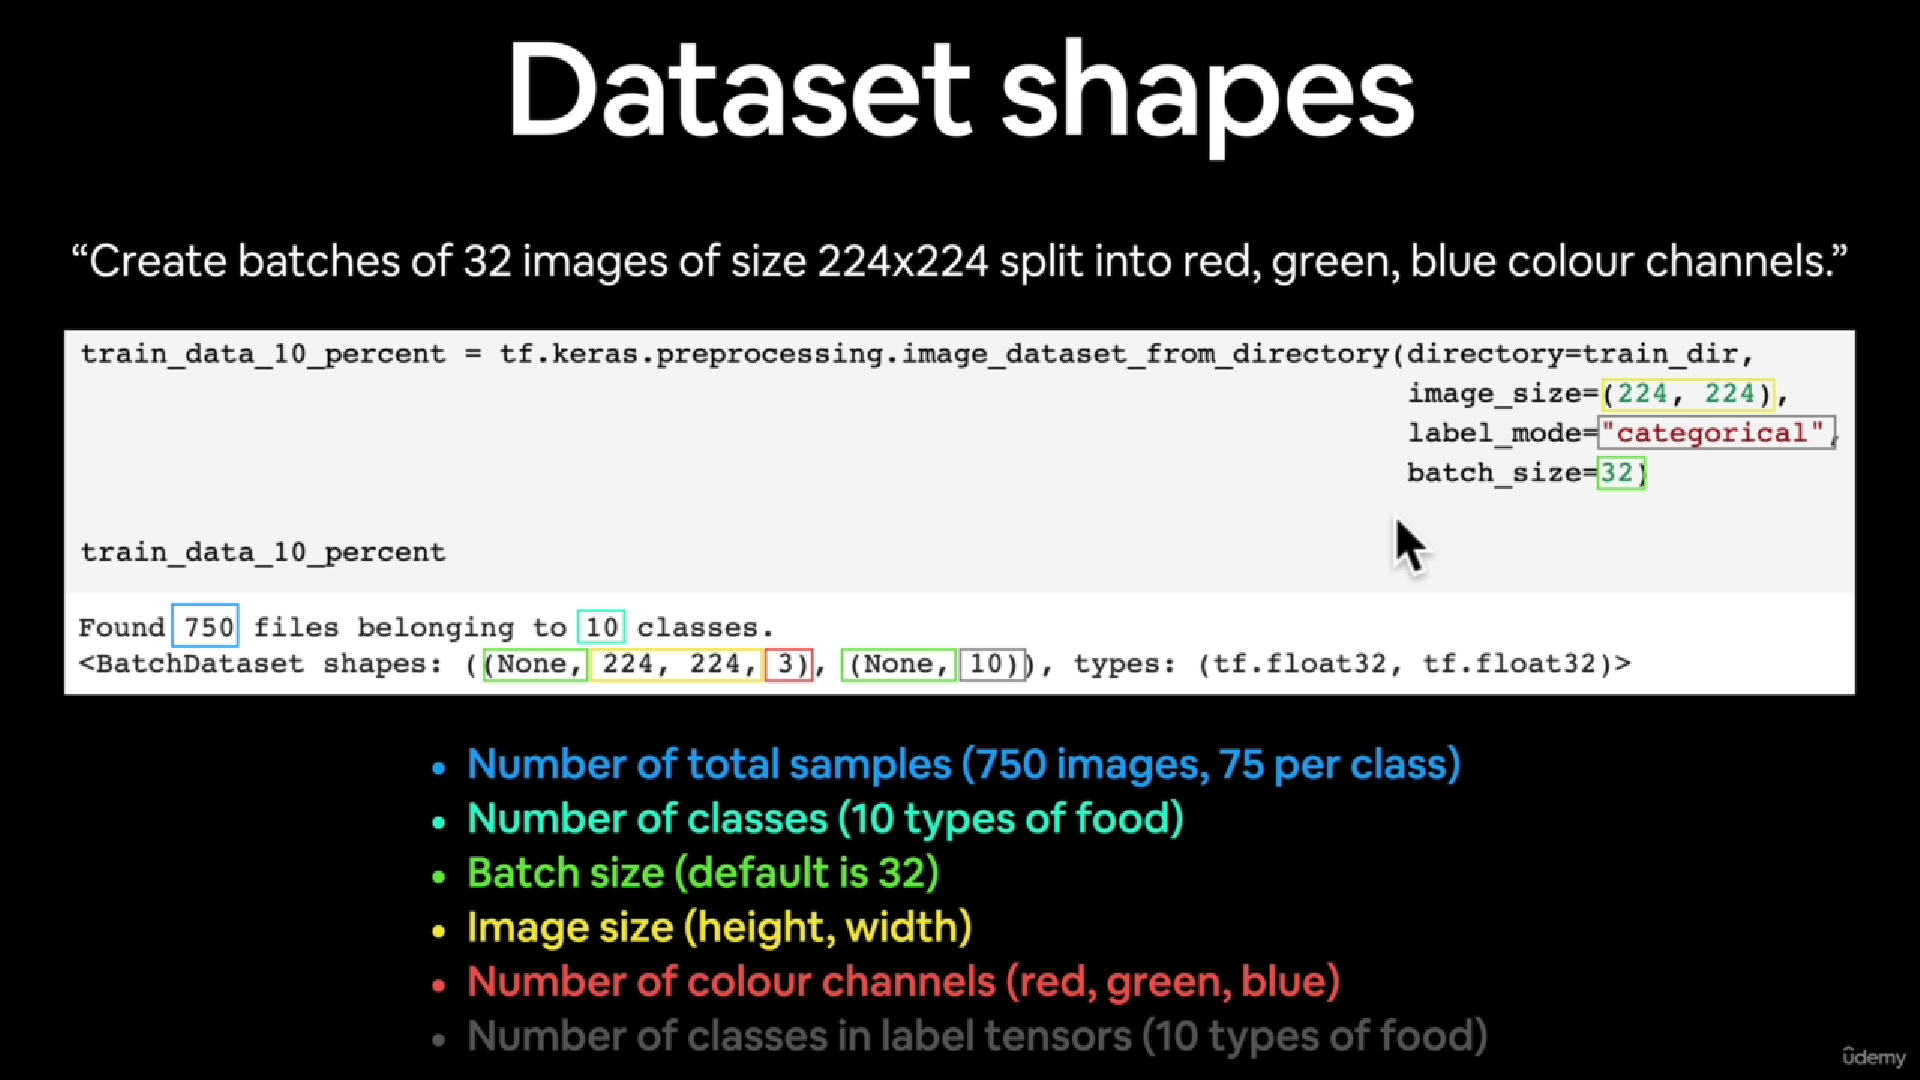

In [ ]:
# Check out the class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# See an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.64285707e+00 3.57142866e-01 1.71428573e+00]
   [1.64285707e+00 3.57142866e-01 1.71428573e+00]
   [1.50510192e+00 0.00000000e+00 3.98979616e+00]
   ...
   [1.04637520e+02 4.94995842e+01 8.22429943e+00]
   [8.76377411e+01 1.85407715e+01 6.63255990e-01]
   [8.55201950e+01 1.03059082e+01 0.00000000e+00]]

  [[0.00000000e+00 1.04591835e+00 5.21428585e+00]
   [0.00000000e+00 1.06632650e+00 5.08163261e+00]
   [0.00000000e+00 1.00000000e+00 6.14285707e+00]
   ...
   [1.09453888e+02 6.33823090e+01 1.58110113e+01]
   [1.05464241e+02 4.58162422e+01 1.16019945e+01]
   [9.49384766e+01 3.03670464e+01 3.59680128e+00]]

  [[0.00000000e+00 1.64285719e+00 9.57142830e+00]
   [0.00000000e+00 1.92857170e+00 7.71428537e+00]
   [0.00000000e+00 1.78571439e+00 8.00000000e+00]
   ...
   [1.18025360e+02 8.26885071e+01 2.82600689e+01]
   [9.95205307e+01 5.35766106e+01 8.29093456e+00]
   [1.14305908e+02 6.31630516e+01 2.20916233e+01]]

  ...

  [[4.08009338e+01 1.50917625e+01 0.00000000e+00]
   [1

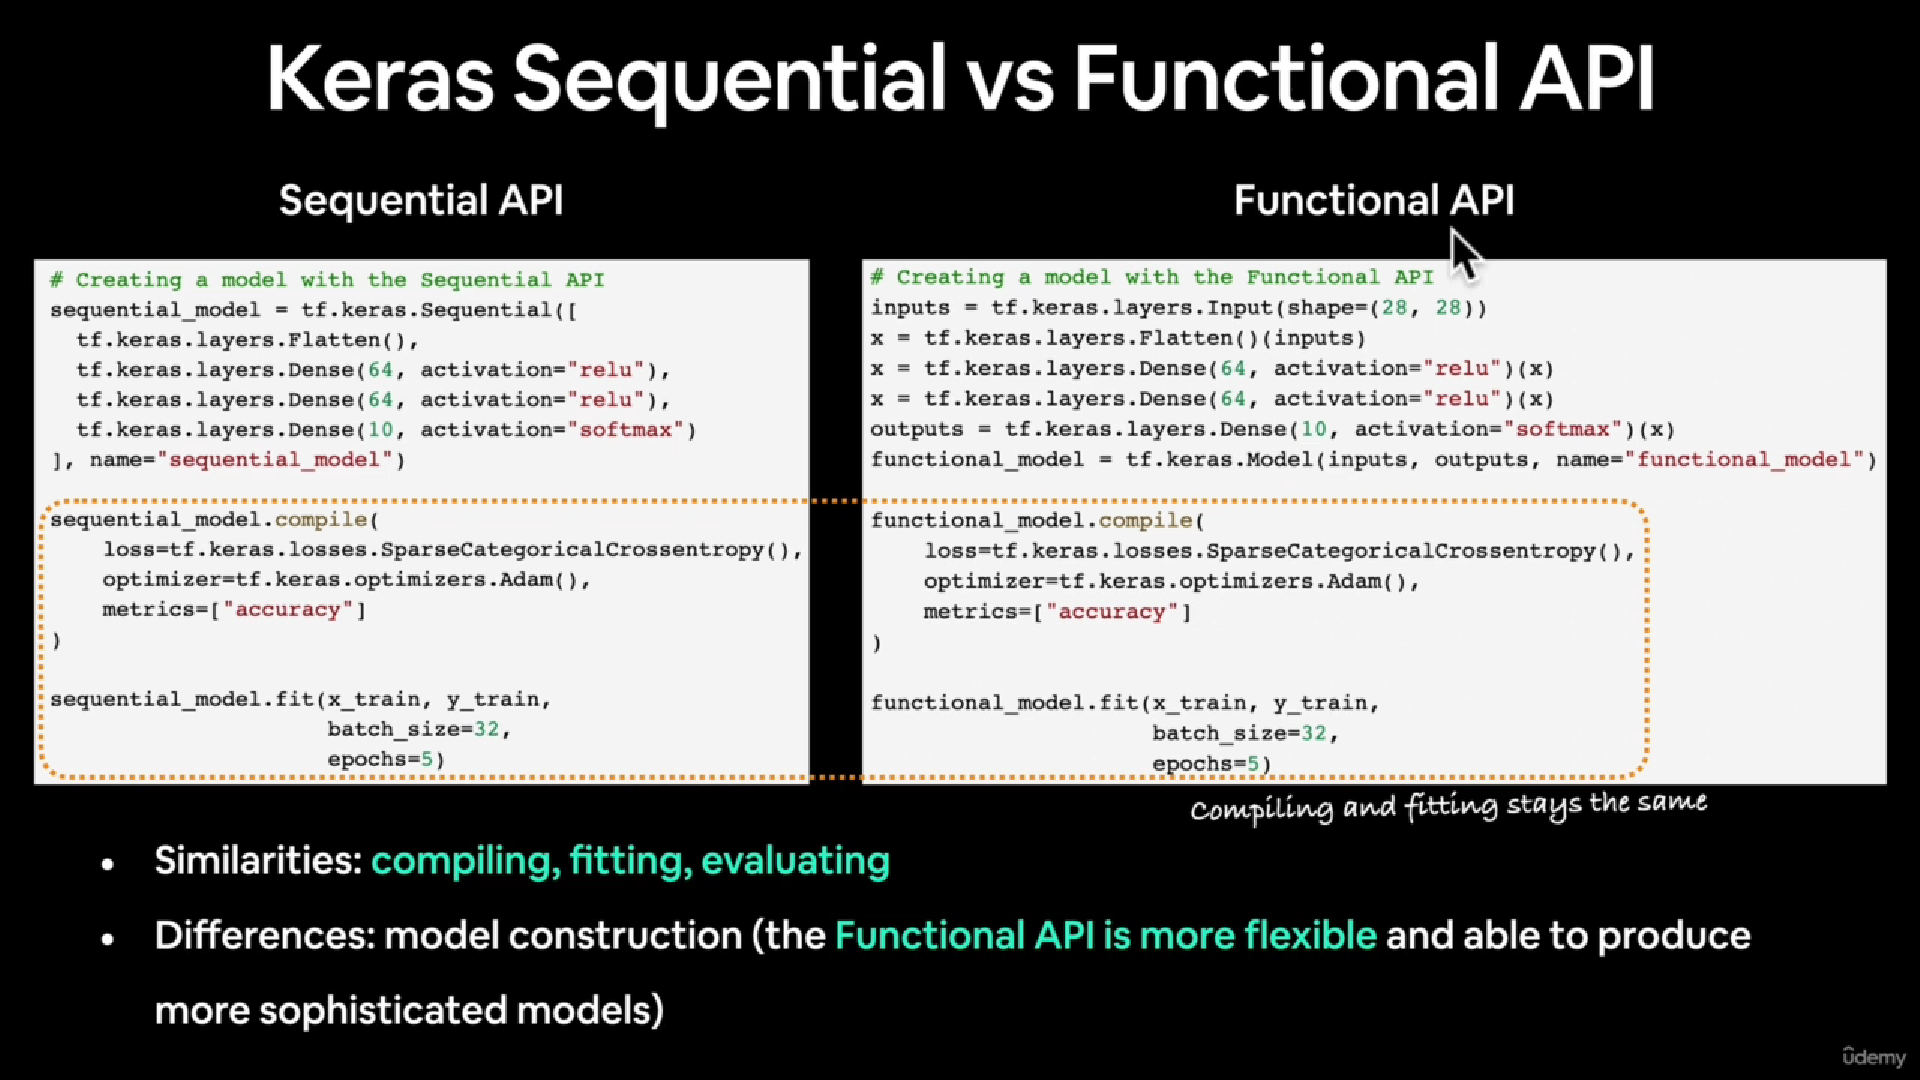

## Model 0: Building a transfer learning model using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional)

In [ ]:
# 1. Create base model using tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained pattern aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# 4. Normalize inputs if using a model like ResNet50V2 (Not needed for EfficientNet)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
# x = tf.keras.layers.Rescaling(1./255)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important info, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"Shape after GlobalAveragePool2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 10. Fit the model and save its history
history_10_percent = model_0.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback(
        dir_name='transfer_learning',
        experiment_name='10_percent_feature_extraction'
    )]
)

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePool2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20221002-212506
Epoch 1/5
24/24 [==============================] - 26s 225ms/step - loss: 1.9081 - accuracy: 0.4120 - val_loss: 1.3705 - val_accuracy: 0.7072
Epoch 2/5
24/24 [==============================] - 5s 186ms/step - loss: 1.1456 - accuracy: 0.7440 - val_loss: 0.8960 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - 4s 152ms/step - loss: 0.8522 - accuracy: 0.8067 - val_loss: 0.7425 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 5s 185ms/step - loss: 0.6933 - accuracy: 0.8267 - val_loss: 0.6474 - val_accuracy: 0.8388
Epoch 5/5
24/24 [==============================] - 5s 186ms/step - loss: 0.6063 - accuracy: 0.8507 - val_loss: 0.6085 - val_accuracy: 0.8438


In [ ]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.6097 - accuracy: 0.8388


[0.6097390651702881, 0.8388000130653381]

In [ ]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
# Get the summary of the base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
# Get the summary of model_0
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


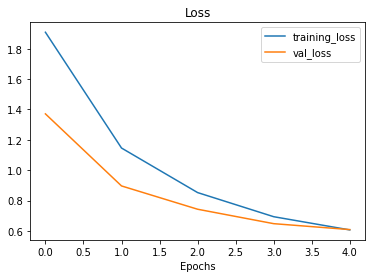

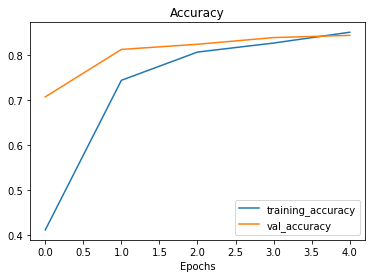

In [ ]:
plot_loss_curves(history_10_percent)

## Getting a feature vector from a trained model

In [ ]:
# Demonstrate GlobalAveragePooling2D

# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n{input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n{global_avg_pooled_tensor}\n")

# Check the shape of different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor: {global_avg_pooled_tensor.shape}")

Random input tensor:
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
[[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor: (1, 3)


In [ ]:
# Replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

> ⚒ **Practice:** Try to do the same above two cells but this time use `GlobalMaxPool2D`... and see what happens.

In [ ]:
input_shape = (1, 3, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n{input_tensor}\n")

global_max_pool_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"2D global max pooled tensor:\n{global_max_pool_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Max Pooled 2D tensor: {global_max_pool_tensor.shape}")

Random input tensor:
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]]]

2D global max pooled tensor:
[[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 3, 4, 3)
Shape of Global Max Pooled 2D tensor: (1, 3)


In [ ]:
tf.reduce_max(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Running a series of transfer learning experiments

1. `model_1` — use feature extraction transfer learning with 1% of the training data with data augmentation.
2. `model_2` — use feature extraction transfer learning with 10% of the training data with data augmentation
3. `model_3` — use fine-tuning transfer learning on 10% of the training data with data augmentation
4. `model_4` — use fine-tuning transfer learning on 100% of the training data with data augmentation

> 🔑 **NOTE:** Throughout all experiments the same test dataset will be used to evaluate our model... this ensures consistency across evaluation metrics.

###  Downloading and Preprocessing the data

In [ ]:
# Download and unzip data — preprocessed from Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2022-10-02 21:26:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.2.112, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   143MB/s    in 0.9s    

2022-10-02 21:26:04 (143 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# Create directories
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [ ]:
# How many images are we working with?
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There a

In [ ]:
# Set up data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode='categorical',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Get the class names
class_names = train_data_1_percent.class_names
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


#### Adding data augmentation right into the model

To add data augmentation right into our models, we can use the layers inside:

* `tf.keras.layers`

We can see the benefits of doing this within the [TensorFlow Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation#use_keras_preprocessing_layers)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Create data augmentation stage with horizontal flippin, rotations, zooms, etc...
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
    #layers.Rescaling(1./255)   # Keep for models like ResNet50V2
], name='data_augmentation')

#### Visualizing the data augmentation layer

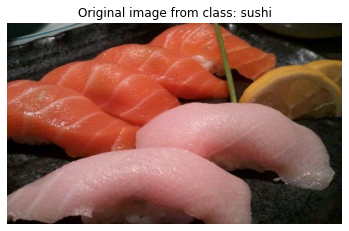

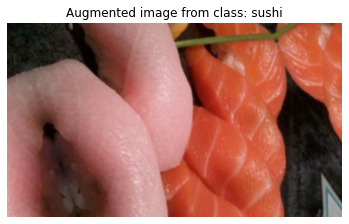

In [ ]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read and plot in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original image from class: {target_class}")
plt.axis(False);

# Read and plot the augmented random image
image = tf.cast(tf.expand_dims(img, 0), tf.float32)
augmented_image = data_augmentation(image, training=True) # training parameter needs to be set to TRUE for data augmentation to work
plt.figure()
plt.imshow(tf.squeeze(augmented_image)/255.)
plt.title(f"Augmented image from class: {target_class}")
plt.axis(False);

In [ ]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### `model_1`: Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base_model
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1_percent = model_1.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)), # validate for less steps
    # track model training logs
    callbacks=[create_tensorboard_callback(
        'transfer_learning',
        '1_percent_data_aug'
    )]
)

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20221002-212609
Epoch 1/5
3/3 [==============================] - 12s 2s/step - loss: 2.4492 - accuracy: 0.0857 - val_loss: 2.2192 - val_accuracy: 0.1924
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1857 - accuracy: 0.2000 - val_loss: 2.1316 - val_accuracy: 0.2418
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9688 - accuracy: 0.3714 - val_loss: 2.0282 - val_accuracy: 0.3076
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8003 - accuracy: 0.4857 - val_loss: 1.9373 - val_accuracy: 0.3849
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6599 - accuracy: 0.5571 - val_loss: 1.8497 - val_accuracy: 0.4145


In [ ]:
# Check out model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
# Evaluate on the test data
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 73ms/step - loss: 1.8459 - accuracy: 0.4128


[1.8458890914916992, 0.41280001401901245]

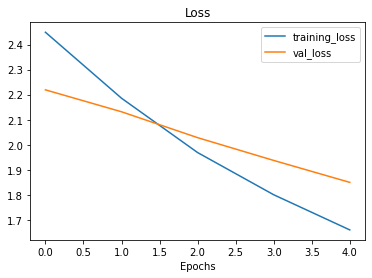

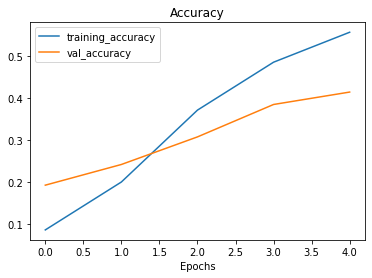

In [ ]:
# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_percent)

###`model_2`: Feature extraction transfer learning with 10% of the training data with data augmentation

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
], name='data_augmentation')

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_2 = keras.Model(inputs, outputs)
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#### Creating a `ModelCheckpoint` callback

In [ ]:
# Set checkpoint path
checkpoint_path = '10_percent_model_checkpoints_weights/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq='epoch',
    verbose=1
)

In [ ]:
initial_epochs = 5

history_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs=initial_epochs,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_data_aug'), 
               checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20221002-212650
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0044 - accuracy: 0.3333
Epoch 1: val_loss improved from inf to 1.48611, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 529ms/step - loss: 2.0044 - accuracy: 0.3333 - val_loss: 1.4861 - val_accuracy: 0.6513
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3617 - accuracy: 0.6760
Epoch 2: val_loss improved from 1.48611 to 1.04489, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 428ms/step - loss: 1.3617 - accuracy: 0.6760 - val_loss: 1.0449 - val_accuracy: 0.7681
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0516 - accuracy: 0.7573
Epoch 3: val_loss improved from 1.04489 to 0.85240, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [====

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 73ms/step - loss: 0.6097 - accuracy: 0.8388


[0.6097390055656433, 0.8388000130653381]

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 74ms/step - loss: 0.6997 - accuracy: 0.8060


[0.6996554732322693, 0.8059999942779541]

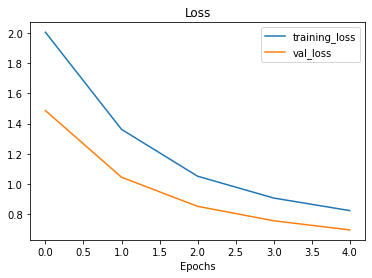

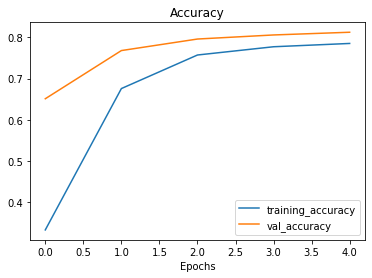

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

#### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint.

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluate model_2 with loaded weights
loaded_weight_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.6997 - accuracy: 0.8060


In [ ]:
results_10_percent_data_aug == loaded_weight_model_results

False

In [ ]:
# Check to see if loaded model results are very close to the previous non-loaded model results
import numpy as np
np.isclose(
    np.array(results_10_percent_data_aug),
    np.array(loaded_weight_model_results))

array([ True,  True])

In [ ]:
# Check the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weight_model_results))

[2.38418579e-07 0.00000000e+00]


### `model_3`: Fine-tuning an existing model on 10% of data

> 🔑 **Note:** Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data.

In [ ]:
# Layer in loaded model
model_2.layers

In [ ]:
# Are these layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f4ca9b55390> True
<keras.engine.sequential.Sequential object at 0x7f4ca9af7490> True
<keras.engine.functional.Functional object at 0x7f4ca966c1d0> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f4ca9b16450> True
<keras.layers.core.dense.Dense object at 0x7f4d3d0a6550> True


In [ ]:
# What layer are in our base_model (EfficientNetB0) and are they trainable?
for layer  in model_2.layers[2].layers:
  print(layer.name, layer.trainable)

input_3 False
rescaling_2 False
normalization_2 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False

In [ ]:
# How many trainable variables are in our base_model?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# To begin fine-tuning, start by setting the last 10 layers of the base_model.trainable = True
base_model.trainable = True

# Freeze all layer except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the models every time we make a change
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning you typically want to lower the learning rate by 10x*
    metrics=['accuracy']
)

> 🔑 **Note:** When fine-tuning it's best practice to lower the learning rate by some amount. A good resource for information on this is the [ULMFiT paper](https://arxiv.org/abs/1801.06146).

In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine-tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_10_percent_fine_tuned = model_2.fit(
    train_data_10_percent,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    initial_epoch=history_10_percent_data_aug.epoch[-1], #start training from previous last epoch
    callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_fine_tuned_last_10')]
)

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuned_last_10/20221002-212826
Epoch 5/10
24/24 [==============================] - 19s 470ms/step - loss: 0.6917 - accuracy: 0.8227 - val_loss: 0.5601 - val_accuracy: 0.8289
Epoch 6/10
24/24 [==============================] - 8s 339ms/step - loss: 0.5434 - accuracy: 0.8307 - val_loss: 0.4795 - val_accuracy: 0.8602
Epoch 7/10
24/24 [==============================] - 9s 377ms/step - loss: 0.5419 - accuracy: 0.8307 - val_loss: 0.4808 - val_accuracy: 0.8470
Epoch 8/10
24/24 [==============================] - 8s 336ms/step - loss: 0.4549 - accuracy: 0.8587 - val_loss: 0.4682 - val_accuracy: 0.8487
Epoch 9/10
24/24 [==============================] - 9s 346ms/step - loss: 0.4121 - accuracy: 0.8733 - val_loss: 0.4573 - val_accuracy: 0.8569
Epoch 10/10
24/24 [==============================] - 9s 350ms/step - loss: 0.3711 - accuracy: 0.8880 - val_loss: 0.4879 - val_accuracy: 0.8454


In [ ]:
# Evaluate the fine-tuned model
results_fine_tuned_10_percent = model_2.evaluate(test_data)
results_fine_tuned_10_percent

79/79 [==============================] - 6s 73ms/step - loss: 0.5071 - accuracy: 0.8316


[0.5071240067481995, 0.83160001039505]

In [ ]:
results_10_percent_data_aug

[0.6996554732322693, 0.8059999942779541]

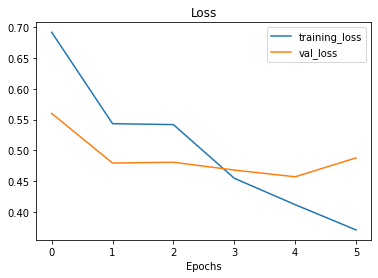

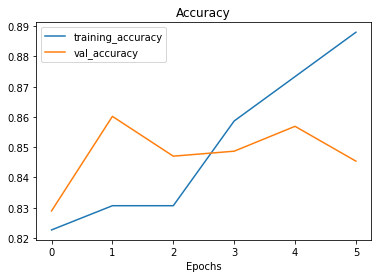

In [ ]:
plot_loss_curves(history_10_percent_fine_tuned)

The `plot_loss_curves` function works great with models which have only been fit once, however, we want something to compare one series of running `fit()` with another (e.g. before and after fine-tuning).

In [21]:
# Create a function to compare training histories
def compare_histories(original_history, new_history, initial_epochs=5):
  """
  Compares two TensorFlow History object.
  """
  # Get original history measurements
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # Combine original history
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Make plot for Accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Val Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  # Make plot for Loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Val Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

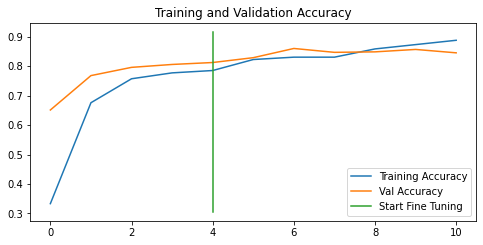

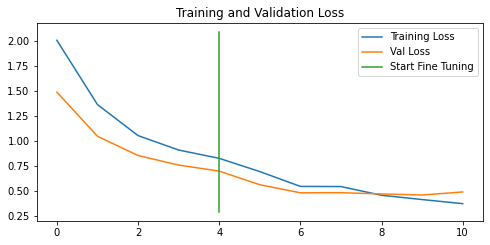

In [ ]:
compare_histories(history_10_percent_data_aug, history_10_percent_fine_tuned, initial_epochs=5)

### `model_4`: Fine-tuning an existing model on 100% of data

In [ ]:
# Downloading the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2022-10-02 21:29:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 172.217.164.176, 142.251.45.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   204MB/s    in 2.4s    

2022-10-02 21:29:45 (204 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Setup directories
train_dir_all_data = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [ ]:
# How many images are we working with now?
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [ ]:
# Setup data inputs
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_full = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_all_data,
    label_mode='categorical',
    image_size=IMG_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=IMG_SIZE
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Evaluate model_2
model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.5071 - accuracy: 0.8316


[0.5071240663528442, 0.83160001039505]

In [ ]:
results_fine_tuned_10_percent

[0.5071240067481995, 0.83160001039505]

To train a fine-tuning model (`model_4`) we need to revert `model_2` back to its feature extraction weights.

In [ ]:
# Load weight from checkpoint
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluate model_2
model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6997 - accuracy: 0.8060


[0.6996551752090454, 0.8059999942779541]

In [ ]:
# Check to see if model_2 has been reverted back to feature extraction results
results_10_percent_data_aug

[0.6996554732322693, 0.8059999942779541]

In [ ]:
# Check which layers are trainable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_avg_pooling_layer True
4 output_layer True


In [ ]:
# What layer are trainable in our base_model
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# Recompile the model
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [ ]:
# Train and fine-tune the model to the data (100% of training data)
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(
    train_data_full,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    initial_epoch=history_10_percent_data_aug.epoch[-1],
    callbacks=[create_tensorboard_callback('transfer_learning', 'full_data_fine_tuned')]
)

Saving TensorBoard log files to: transfer_learning/full_data_fine_tuned/20221002-213004
Epoch 5/10
235/235 [==============================] - 61s 233ms/step - loss: 0.7297 - accuracy: 0.7699 - val_loss: 0.3760 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 47s 197ms/step - loss: 0.5951 - accuracy: 0.8057 - val_loss: 0.3591 - val_accuracy: 0.8668
Epoch 7/10
235/235 [==============================] - 45s 190ms/step - loss: 0.5317 - accuracy: 0.8319 - val_loss: 0.2913 - val_accuracy: 0.8914
Epoch 8/10
235/235 [==============================] - 40s 168ms/step - loss: 0.4918 - accuracy: 0.8432 - val_loss: 0.3317 - val_accuracy: 0.8766
Epoch 9/10
235/235 [==============================] - 40s 170ms/step - loss: 0.4499 - accuracy: 0.8564 - val_loss: 0.3444 - val_accuracy: 0.8734
Epoch 10/10
235/235 [==============================] - 37s 156ms/step - loss: 0.4235 - accuracy: 0.8653 - val_loss: 0.2952 - val_accuracy: 0.8997


In [ ]:
# Evaluate on all test data
results_fine_tuned_full_data = model_2.evaluate(test_data)
results_fine_tuned_full_data

79/79 [==============================] - 6s 73ms/step - loss: 0.3273 - accuracy: 0.8932


[0.3273433446884155, 0.8931999802589417]

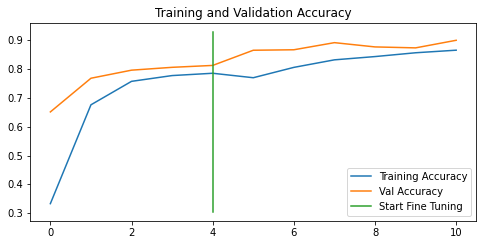

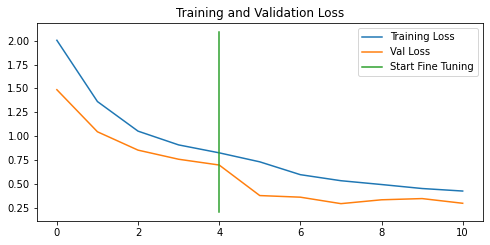

In [ ]:
# How did fine-tuning go with full data?
compare_histories(history_10_percent_data_aug, history_fine_10_classes_full, initial_epochs=5)

## Viewing our experiment data on TensorBoard

In [ ]:
# View tensorboard logs of transfer learning modelling experiments
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name 'Transfer Learning Experiments with 10 Food101 Classes' \
  --description 'A series of different transfer learning experiments with varying amount of data and fine-tuning.' \
  --one_shot # exits the uploader once its finished uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=l67b4LZpnrs86m5AgZNEZEcUYNekTl&prompt=consent&access_type=o

TensorBoard experiments: https://tensorboard.dev/experiment/e6ptPEZwRYu9ou3V5yDDDw/

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/e6ptPEZwRYu9ou3V5yDDDw/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of different transfer learning experiments with varying amount of data and fine-tuning.
	Id                   e6ptPEZwRYu9ou3V5yDDDw
	Created              2022-10-02 21:42:23 (14 minutes ago)
	Updated              2022-10-02 21:42:28 (13 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4307488
https://tensorboard.dev/experiment/0vcbZe1QR1eF38Aefknt0w/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction model architecture using 10% of the training data.
	Id                   0vcbZe1QR1eF38Aefknt0w
	Created              2022-09-24 21:34:56
	Updated              2022-09-24 21:34:59
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes     

In [ ]:
# To delete an experiment
# !tensorboard dev delete --experiment_id Id(0vcbZe1QR1eF38Aefknt0w)

# Transfer Learning: Fine-tuning Exercises

1. Use feature extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using `tf.keras.applications.EfficientNetB0` as the base model. Use the `ModelCheckpoint` callback to save the weights to file.
2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs.
3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs.
4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza", ...etc), visualize it and make a prediction on it using a trained model.

In [1]:
# Import helper functions
!wget https://raw.githubusercontent.com/tankTopTaro/Deep-Learning-with-Python/main/helper_functions/helper_functions.py

--2022-10-03 04:35:00--  https://raw.githubusercontent.com/tankTopTaro/Deep-Learning-with-Python/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10235 (10.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.00K  --.-KB/s    in 0s      

2022-10-03 04:35:00 (76.9 MB/s) - ‘helper_functions.py’ saved [10235/10235]



In [2]:
from helper_functions import unzip_data, walk_through_dir, create_tensorboard_callback, plot_loss_curves, compare_historys

## Downloading and turning images in BatchDataset

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-10-03 04:35:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  41.8MB/s    in 3.8s    

2022-10-03 04:35:20 (41.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data('10_food_classes_10_percent.zip')

In [5]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [6]:
# Create directory paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [7]:
# Turn data into BatchDataset
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [60]:
# Check the class names
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [61]:
import random
import matplotlib.pyplot as plt

# Rebuild pred_and_plot function to work with multi-class images
def pred_and_plot(model, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  rand = random.randint(0, 32)
  for images, labels in test_data.take(1):
    img = images[rand].numpy().astype('uint8')

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for predicted class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

## Model 0

In [10]:
# Create checkpoint path
checkpoint_path = 'model_checkpoint_weights/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq='epoch',
    verbose=1
)

In [58]:
INITIAL_EPOCHS = 10

# Create the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# Pass the input to the base model
x = base_model(inputs)

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pool')(x)

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_0 = model_0.fit(
    train_data,
    epochs = INITIAL_EPOCHS,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [create_tensorboard_callback('transfer_learning', 'feature_extraction'),
                 checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/feature_extraction/20221003-055255
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.9295 - accuracy: 0.3653
Epoch 1: val_loss did not improve from 0.48850
24/24 [==============================] - 23s 646ms/step - loss: 1.9295 - accuracy: 0.3653 - val_loss: 1.3875 - val_accuracy: 0.6720
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.1626 - accuracy: 0.7310
Epoch 2: val_loss did not improve from 0.48850
24/24 [==============================] - 10s 406ms/step - loss: 1.1582 - accuracy: 0.7333 - val_loss: 0.9442 - val_accuracy: 0.7956
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.8511 - accuracy: 0.8084
Epoch 3: val_loss did not improve from 0.48850
24/24 [==============================] - 8s 330ms/step - loss: 0.8490 - accuracy: 0.8093 - val_loss: 0.7660 - val_accuracy: 0.8200
Epoch 4/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7017 - accuracy: 0.8302
Ep

In [73]:
result_0 = model_0.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.4119 - accuracy: 0.8652


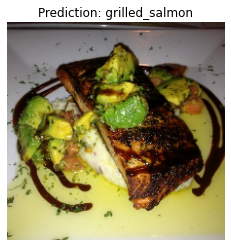

In [70]:
pred_and_plot(model_0, class_names)

## Fine-tune the last 20 layers of the base model for another 10 epochs

In [12]:
model_0.layers

In [67]:
# Set base_model.trainable = True
base_model.trainable = True

# Freeze all layer except the last 20
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [18]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [77]:
# Recompile the model and reduce learning rate
model_0.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

In [78]:
# Fine-tune the model for another 10 epochs
FINE_TUNE_EPOCHS = INITIAL_EPOCHS + 10

# Refit the model
history_1 = model_0.fit(
    train_data,
    epochs = FINE_TUNE_EPOCHS,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    initial_epoch = history_0.epoch[-1], # start training from previous last epoch
    callbacks = [create_tensorboard_callback('transfer_learning', 'fine_tuned_last_20')]
)

Saving TensorBoard log files to: transfer_learning/fine_tuned_last_20/20221003-060126
Epoch 10/20
24/24 [==============================] - 11s 219ms/step - loss: 0.0868 - accuracy: 0.9920 - val_loss: 0.4745 - val_accuracy: 0.8454
Epoch 11/20
24/24 [==============================] - 4s 162ms/step - loss: 0.0689 - accuracy: 0.9933 - val_loss: 0.4715 - val_accuracy: 0.8421
Epoch 12/20
24/24 [==============================] - 5s 193ms/step - loss: 0.0572 - accuracy: 0.9960 - val_loss: 0.4746 - val_accuracy: 0.8405
Epoch 13/20
24/24 [==============================] - 4s 163ms/step - loss: 0.0449 - accuracy: 0.9973 - val_loss: 0.4780 - val_accuracy: 0.8470
Epoch 14/20
24/24 [==============================] - 4s 162ms/step - loss: 0.0384 - accuracy: 0.9973 - val_loss: 0.4884 - val_accuracy: 0.8487
Epoch 15/20
24/24 [==============================] - 4s 163ms/step - loss: 0.0320 - accuracy: 0.9987 - val_loss: 0.4732 - val_accuracy: 0.8438
Epoch 16/20
24/24 [==============================] - 4s

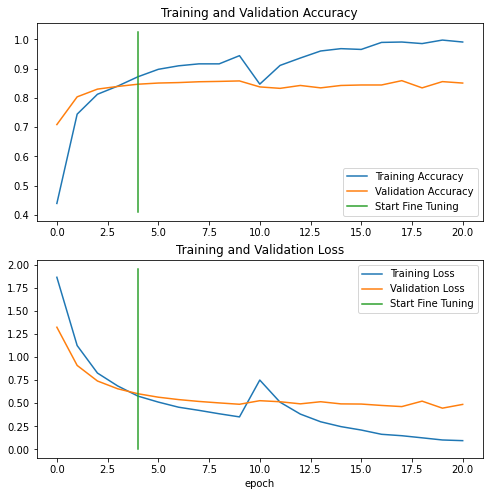

In [22]:
compare_historys(history_0, history_1)

In [79]:
result_1 = model_0.evaluate(test_data)
result_1

79/79 [==============================] - 6s 73ms/step - loss: 0.4045 - accuracy: 0.8688


[0.40448254346847534, 0.8687999844551086]

In [75]:
result_0

[0.41188743710517883, 0.8651999831199646]

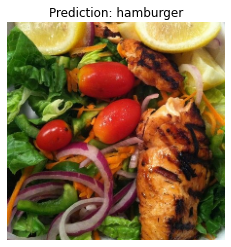

In [81]:
pred_and_plot(model_0, class_names)

## Fine-tune the last 30 layers of the base model you trained for another 10 epochs.

In [82]:
# Load weights from checkpoint
model_0.load_weights(checkpoint_path)

In [83]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

In [84]:
model_0.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

In [85]:
FINE_TUNE_EPOCHS = INITIAL_EPOCHS + 10

history_2 = model_0.fit(
    train_data,
    epochs = FINE_TUNE_EPOCHS,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    initial_epoch = history_0.epoch[-1],
    callbacks = [create_tensorboard_callback('transfer_learning', 'fine_tune_last_30')]
)

Saving TensorBoard log files to: transfer_learning/fine_tune_last_30/20221003-060352
Epoch 10/20
24/24 [==============================] - 16s 420ms/step - loss: 0.8258 - accuracy: 0.8067 - val_loss: 0.5156 - val_accuracy: 0.8421
Epoch 11/20
24/24 [==============================] - 7s 237ms/step - loss: 0.5270 - accuracy: 0.9093 - val_loss: 0.5052 - val_accuracy: 0.8339
Epoch 12/20
24/24 [==============================] - 6s 223ms/step - loss: 0.3903 - accuracy: 0.9400 - val_loss: 0.5408 - val_accuracy: 0.8207
Epoch 13/20
24/24 [==============================] - 5s 198ms/step - loss: 0.3170 - accuracy: 0.9493 - val_loss: 0.5134 - val_accuracy: 0.8273
Epoch 14/20
24/24 [==============================] - 8s 324ms/step - loss: 0.2459 - accuracy: 0.9667 - val_loss: 0.4904 - val_accuracy: 0.8372
Epoch 15/20
24/24 [==============================] - 5s 200ms/step - loss: 0.2094 - accuracy: 0.9747 - val_loss: 0.4824 - val_accuracy: 0.8470
Epoch 16/20
24/24 [==============================] - 6s 

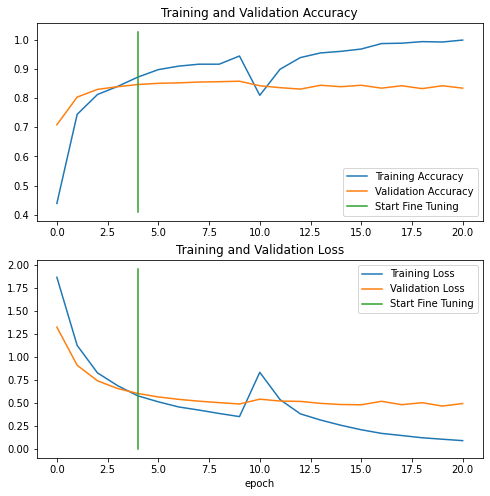

In [31]:
compare_historys(history_0, history_2)

In [86]:
result_0

[0.41188743710517883, 0.8651999831199646]

In [87]:
result_1

[0.40448254346847534, 0.8687999844551086]

In [88]:
result_2 = model_0.evaluate(test_data)
result_2

79/79 [==============================] - 6s 74ms/step - loss: 0.4175 - accuracy: 0.8620


[0.4174606502056122, 0.8619999885559082]

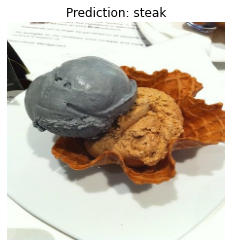

In [90]:
pred_and_plot(model_0, class_names)